In [2]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import seaborn as sb

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Korisnik\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')]

In [11]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()
df_plot

,count
job_location,
Anywhere,5106
"New York, NY",3035
"Atlanta, GA",2741
"Chicago, IL",2337
"Austin, TX",1919
"Dallas, TX",1862
"Washington, DC",1592
"Charlotte, NC",1433
"Tampa, FL",1431


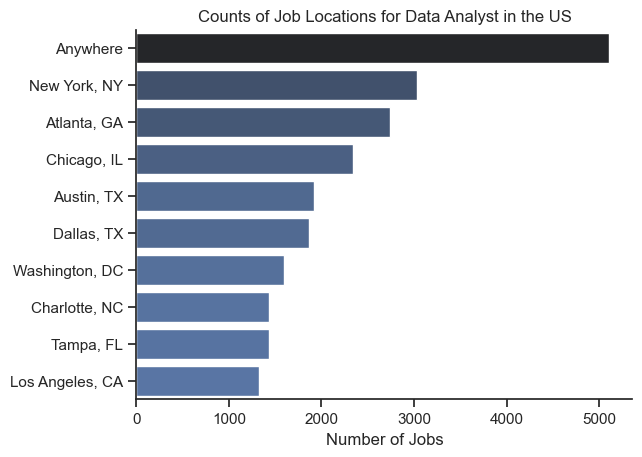

In [13]:
sb.set_theme(style='ticks')
sb.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sb.despine() # uklanja okvir
plt.title('Counts of Job Locations for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

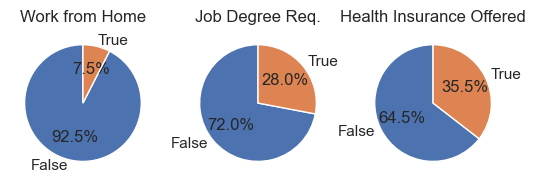

In [6]:
fig, ax = plt.subplots(1,3)

dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
}

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)
plt.show()

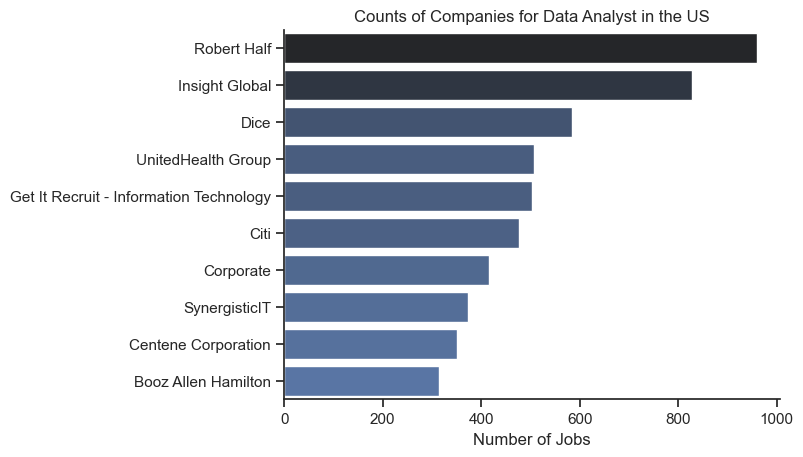

In [7]:
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()
sb.set_theme(style='ticks')
sb.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sb.despine() # uklanja okvir
plt.title('Counts of Companies for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()